## This notebook is to compare SS concentrations from the LISST to turbidity measurements from the sondes

### Import and cleanup data

In [14]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy import stats

# directories where the CSV files are stored
down_turbidities = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/turbidity_down'
up_turbidities = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/turbidity_up'
down_constituents = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/constituents_down'
up_constituents = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/constituents_up'
depths = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Suspended_Sediment_Analysis/depth'

# dictionaries to store the data frames
turbidity_down = {}
turbidity_up = {}
SS_down = {}
SS_up = {}
depth = {}

# iterate over all files in the directory

# turbidity data
for filename in os.listdir(down_turbidities):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(down_turbidities, filename)     # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['DateTime'])                 # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['DateTime'])    # convert to datetime format
        df = df.drop(columns=['DateTime'])                  # drop the original 'DateTime' column
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        #print(key)                              
        turbidity_down[key] = df                                 # store the data frame in the dictionary
for filename in os.listdir(up_turbidities):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(up_turbidities, filename)     # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['DateTime'])                 # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['DateTime'])    # convert to datetime format
        df = df.drop(columns=['DateTime'])                  # drop the original 'DateTime' column
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        #print(key)                              
        turbidity_up[key] = df                                 # store the data frame in the dictionary

# constituents data
for filename in os.listdir(down_constituents):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(down_constituents, filename)    # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        #print(key)
        SS_down[key] = df                                        # store the data frame in the dictionary
for filename in os.listdir(up_constituents):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(up_constituents, filename) # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        #print(key)
        SS_up[key] = df                                     # store the data frame in the dictionary

for filename in os.listdir(depths):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(depths, filename)          # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        depth[key] = df                                    # store the data frame in the dictionary

### Composite the dictionaries into one big data frame

In [15]:
# composite turbdity data
# concatenate all dataframes into one
down_turb = pd.concat(turbidity_down.values())
up_turb = pd.concat(turbidity_up.values())
# sort the dataframe by date
down_turb = down_turb.sort_index()
up_turb = up_turb.sort_index()
# drop QualifierID
down_turb = down_turb.drop(columns=['QualifierID'])
up_turb = up_turb.drop(columns=['QualifierID'])
# change DataValue name to Turbidity
down_turb = down_turb.rename(columns={'DataValue':'Turbidity'})
up_turb = up_turb.rename(columns={'DataValue':'Turbidity'})
# resample the data to 1 minute intervals
down_turb = down_turb.resample('1T').interpolate()  
up_turb = up_turb.resample('1T').interpolate()  

down_turb

,Turbidity
Date_Time,
2021-07-11 13:00:00,1.790000
2021-07-11 13:01:00,1.821333
2021-07-11 13:02:00,1.852667
2021-07-11 13:03:00,1.884000
2021-07-11 13:04:00,1.915333
...,...
2023-09-18 10:41:00,0.960000
2023-09-18 10:42:00,0.960000
2023-09-18 10:43:00,0.960000


In [16]:
# composite constituent data
# concatenate all dataframes into one
down_SS = pd.concat(SS_down.values())
up_SS = pd.concat(SS_up.values())
# sort the dataframe by date
down_SS = down_SS.sort_index()
up_SS = up_SS.sort_index()
# drop all columns except for SS (uL/L)
down_SS = down_SS[['SS (uL/L)']]
up_SS = up_SS[['SS (uL/L)']]

### Now we will merge the water depths and SS values 

In [17]:
# merge on the date (index)
down_turb = down_turb.merge(down_SS, left_index=True, right_index=True, how='left')
up_turb = up_turb.merge(up_SS, left_index=True, right_index=True, how='left')

# drop all rows that has no SS data 
down_turb = down_turb.dropna(subset=['SS (uL/L)'])
up_turb = up_turb.dropna(subset=['SS (uL/L)'])

down_turb

,Turbidity,SS (uL/L)
Date_Time,,
2021-07-23 15:50:00,88.960800,339.78248
2021-07-23 16:09:00,295.588800,457.12000
2021-07-23 16:40:00,75.484000,152.79000
2021-07-23 16:55:00,69.550000,168.45000
2021-07-23 19:19:00,22.234000,43.15000
...,...,...
2023-09-14 18:07:00,1.613632,75.40000
2023-09-14 18:22:00,1.609706,70.75000
2023-09-14 18:27:00,1.608398,61.61000


Getting rid of values that are 0 or lower

In [18]:
# drop all rows with negative values
down_turb = down_turb[down_turb['Turbidity'] > 0]
up_turb = up_turb[up_turb['Turbidity'] > 0]
# drop all SS values that are 0
down_turb = down_turb[down_turb['SS (uL/L)'] > 0]
up_turb = up_turb[up_turb['SS (uL/L)'] > 0]


## Plot Turbidity and SS for the entire record 

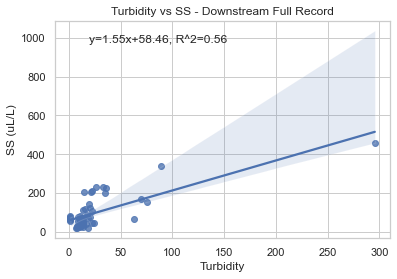

In [19]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(down_turb['Turbidity'], down_turb['SS (uL/L)'])

# create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=down_turb)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)

# Set labels and title
plt.xlabel('Turbidity')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Downstream Full Record')

# Show the plot
plt.show()


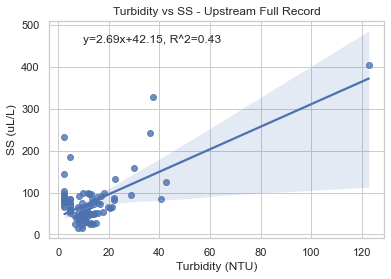

In [20]:
# calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_turb['Turbidity'], up_turb['SS (uL/L)'])

# Create a scatter plot
sns.set_theme(style='whitegrid')
sns.regplot(x='Turbidity', y='SS (uL/L)', data=up_turb)

# add the equation and R^2 value to the plot
plt.text(0.1, 0.9, f'y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f}', transform=plt.gca().transAxes)
# Set labels and title
plt.xlabel('Turbidity (NTU)')
plt.ylabel('SS (uL/L)')
plt.title('Turbidity vs SS - Upstream Full Record')

# Show the plot
plt.show()


# Separation by Season